In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import csv

#load data
inpdat = "../../coadreadDATLOWSPECIAL.csv"
with open(inpdat,'r') as f:
    it = csv.reader(f)
    alldata = list(it)
inpdat = "../../3ormoreDATLOW.csv"
with open(inpdat,'r') as f:
    it = csv.reader(f)
    listit = list(it)

#process data, so for each sample there is a count of each hugo id
hugos = []
for y in range(1,len(listit[0])-1):
    hugos.append(listit[0][y].split("_")[0])
sampcounts = {}
for x in range(1,len(alldata)):
    for y in range(1,len(alldata[0])-1):
        if(alldata[0][y].split("_")[0] in hugos and float(alldata[x][y]) == 1.0):
            if((alldata[x][0],alldata[0][y].split("_")[0]) not in sampcounts):
                sampcounts[(alldata[x][0],alldata[0][y].split("_")[0])] = 0
            sampcounts[(alldata[x][0],alldata[0][y].split("_")[0])] += 1
firstrow = hugos + ["class"]
newdata = []
rowind = []
for x in range(1,len(alldata)):
    nextrow = []
    rowind.append(listit[x][0])
    for hid in hugos:
        if (alldata[x][0],hid) not in sampcounts:
            nextrow.append("0")
        else:
            nextrow.append(sampcounts[(alldata[x][0],hid)])
    nextrow.append(alldata[x][len(alldata[0])-1])
    newdata.append(nextrow)
newdata

[['0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '-1.0'],
 [1,
  '0',
  '0',
  '0',
  1,
  '0',
  '0',
  '0',
  '0',
  '0',
  1,
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '1.0'],
 ['0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '-1.0'],
 [1, 1, 1, 1, 2, 2, 1, '0', '0', '0', '0', '0', '0', 1, '0', '0', '0', '1.0'],
 ['0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '-1.0'],
 ['0',
  '0',
  '0',
  '0',
  1,
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '-1.0'],
 ['0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  1,
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '2.0'],
 ['0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  1,
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '-1.0'],
 ['0',
  '0',
  '0',
  '0

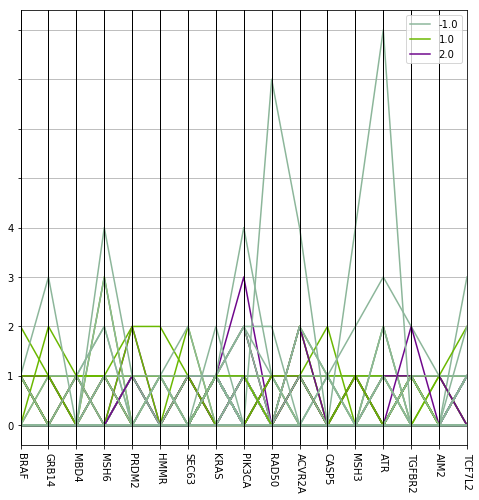

In [8]:
data = pd.DataFrame(newdata,columns=firstrow,index=rowind)
plt.figure(figsize=(8,8))
pd.plotting.parallel_coordinates(data,'class')
plt.yticks(np.arange(0,9,1.0))
plt.xticks(rotation=270)
plt.show()

In [ ]:
sampcounts